In [9]:
import pandas as pd

In [11]:
df = pd.read_csv('loan_data_1248_with_missing.csv')

In [ ]:
## Data preprocessing

## Data preprocessing


In [12]:
df.head()

,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0


In [13]:
df.shape


(1248, 5)

In [14]:
df.columns.to_list()

['income', 'loan_amount', 'term', 'credit_history', 'defaulted']

In [15]:
df.dtypes

,0
income,float64
loan_amount,float64
term,int64
credit_history,float64
defaulted,int64


In [ ]:
## Converting defaulted to boolean
#df["defaulted"] = df["defaulted"].astype(bool)

In [ ]:
df.dtypes

,0
income,float64
loan_amount,float64
term,int64
credit_history,float64
defaulted,int64


In [16]:
df.isnull().sum()

,0
income,120
loan_amount,122
term,0
credit_history,112
defaulted,0


In [ ]:
#fulling missing values

In [17]:
df.fillna({'income':df['income'].median()}, inplace=True)

In [18]:
df.isnull().sum()

,0
income,0
loan_amount,122
term,0
credit_history,112
defaulted,0


In [19]:
df.fillna({'loan_amount' : df['loan_amount'].median()}, inplace=True)

In [20]:
df.fillna({'loan_amount' : df['loan_amount'].median()}, inplace=True)

In [21]:
df.fillna({'credit_history' : df['credit_history'].mode()[0]}, inplace=True)

In [22]:
df.isnull().sum()

,0
income,0
loan_amount,0
term,0
credit_history,0
defaulted,0


In [23]:
df.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,52500.945298,16167.787505,48.000000,0.771635,0.414263
std,16967.161028,5541.521139,12.004811,0.419948,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,41673.912889,12772.722413,36.000000,1.000000,0.000000
50%,52462.564119,16052.247335,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


In [ ]:
## Data Visualizations

## Data Visualizations

Text(0.5, 1.0, 'Loan Distribution')

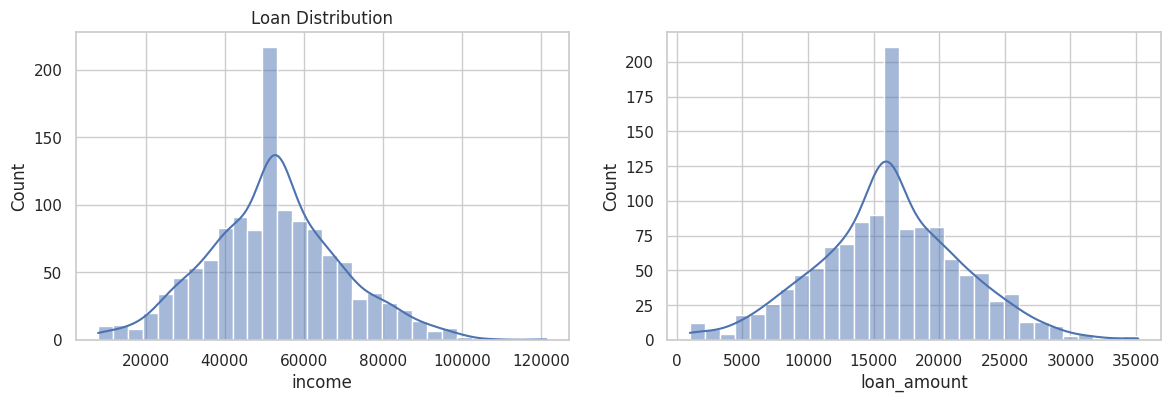

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


## Setting seaborn theme
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize = (14,4))

sns.histplot(df['income'], kde =True, bins=30, ax=axes[0])
axes[0].set_title("Income Distribution")

sns.histplot(df['loan_amount'], kde =True, bins=30, ax = axes[1])
axes[0].set_title("Loan Distribution")


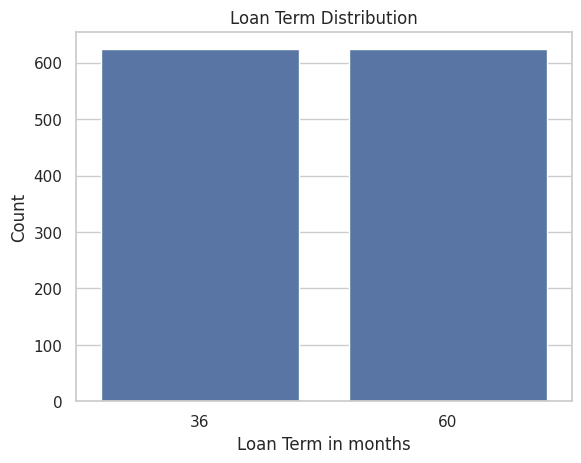

In [25]:
## Count of Loan term
sns.countplot(x='term', data=df)
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term in months")
plt.ylabel("Count")
plt.show()

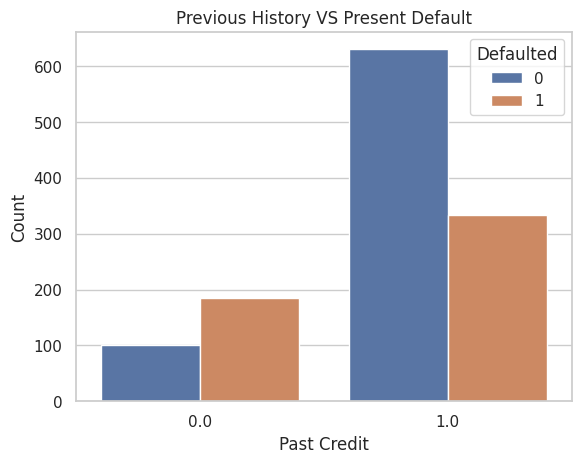

In [26]:
## Credit History

sns.countplot(x='credit_history', hue='defaulted', data=df)
plt.title("Previous History VS Present Default")
plt.xlabel("Past Credit")
plt.ylabel("Count")
plt.legend(title='Defaulted')
plt.show()

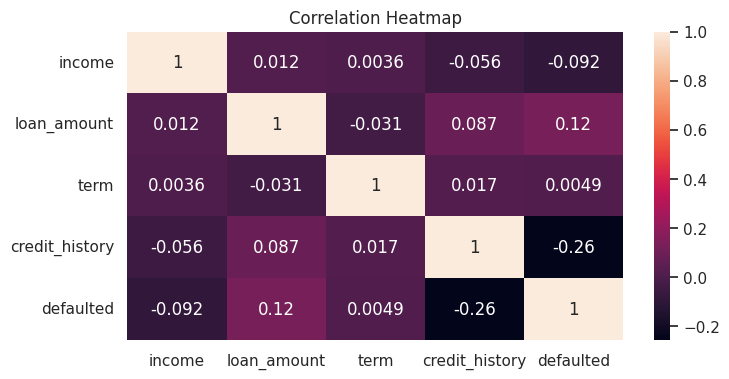

In [27]:
## Correlation Heatmap
plt.figure(figsize= (8,4))
sns.heatmap(df.corr(), annot=True)
plt.title ("Correlation Heatmap")
plt.show()

## Feature Engineering

In [ ]:
## Converting Catagorical Features

In [28]:
## Converting "term" 36---->0 and 60---->1
df['term_in_binary'] = df['term'].apply(lambda x: 0 if x == 36 else 1)

In [29]:
df.head()

,income,loan_amount,term,credit_history,defaulted,term_in_binary
0,60940.854754,17402.715471,60,1.0,1,1
1,49511.242579,6664.626123,36,0.0,0,0
2,63658.393686,17985.281393,60,0.0,1,1
3,79414.537415,21001.173770,36,1.0,0,0
4,47785.239255,4037.586145,36,1.0,0,0


In [30]:
## Creating Derived Feature. Converting income & loan_amount to log

import numpy as np
df['income_log'] = np.log1p(df['income'])
df['loan_amount_log'] = np.log1p(df['loan_amount'])
df.head()

,income,loan_amount,term,credit_history,defaulted,term_in_binary,income_log,loan_amount_log
0,60940.854754,17402.715471,60,1.0,1,1,11.017675,9.764439
1,49511.242579,6664.626123,36,0.0,0,0,10.809975,8.804719
2,63658.393686,17985.281393,60,0.0,1,1,11.061302,9.797365
3,79414.537415,21001.173770,36,1.0,0,0,11.282449,9.952381
4,47785.239255,4037.586145,36,1.0,0,0,10.774493,8.303650


# Feature Selection.

In [32]:
Select_features = ['income_log',	'loan_amount_log', 'credit_history']
target = 'defaulted'

# Model Training

Feature Scaling (StandardScaler from sklearn
)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaling = ['income_log',	'loan_amount_log']
df[features_scaling] = scaler.fit_transform(df[features_scaling])
df.head()

,income,loan_amount,term,credit_history,defaulted,term_in_binary,income_log,loan_amount_log
0,60940.854754,17402.715471,60,1.0,1,1,0.555865,0.335135
1,49511.242579,6664.626123,36,0.0,0,0,0.010029,-1.753786
2,63658.393686,17985.281393,60,0.0,1,1,0.670515,0.406800
3,79414.537415,21001.173770,36,1.0,0,0,1.251689,0.744209
4,47785.239255,4037.586145,36,1.0,0,0,-0.083218,-2.844410


Train & Split. 80% training and 20% testing

In [34]:
from sklearn.model_selection import train_test_split
X = df[Select_features]
y = df[target]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Pipeline


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
models = {
    'Logistic_Regression': LogisticRegression(),
    'Random_Forest': RandomForestClassifier(),
    'Decision_Tree': DecisionTreeClassifier()
}

In [39]:
for name, model in models.items():
    pipe = Pipeline([
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Model: Logistic_Regression
Accuracy: 0.652
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       143
           1       0.67      0.37      0.48       107

    accuracy                           0.65       250
   macro avg       0.66      0.62      0.61       250
weighted avg       0.66      0.65      0.63       250

Model: Random_Forest
Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       143
           1       0.54      0.44      0.48       107

    accuracy                           0.60       250
   macro avg       0.59      0.58      0.58       250
weighted avg       0.59      0.60      0.59       250

Model: Decision_Tree
Accuracy: 0.552
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       143
           1       0.47      0.43      0.45       107